# Plotting striplogs in different styles

This notebooks looks at the main `striplog` object. For the basic objects it depends on, see [Basic objects](./Basic_objects.ipynb).

First, import anything we might need.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import striplog
striplog.__version__

'0.7.1'

In [2]:
from striplog import Legend, Lexicon, Interval, Component

In [3]:
legend = Legend.builtin('NSDOE')
lexicon = Lexicon.default()

<hr />
## An ordinary `striplog`

In [4]:
from striplog import Striplog
imgfile = "data/images/M-MG-70_14.3_135.9.png"

In [5]:
strip = Striplog.from_image(imgfile, 14.3, 135.9, legend=legend)
strip

Striplog(26 Intervals, start=14.3, stop=135.9)

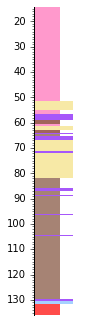

In [6]:
strip.plot(legend, ladder=True, aspect=3)

Let's add some random porosity data:

In [7]:
import random
for iv in strip:
    iv.data['porosity'] = random.random()/5

Now we can plot the striplog mapping a colorbar to this porosity data:

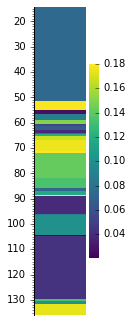

In [8]:
strip.plot(colour='porosity', aspect=3)

<hr />
## Plotting tops

I recommend treating tops as intervals, not as point data. This is the default.

Note the magic word `Comp` (or `Component`) to load as a component, rather than data — it's up to you what you prefer.

Note also that these are out of order; they will be sorted. 

In [17]:
tops_csv = """top, Comp formation
25, Escanilla Fm.
35, San Vicente Fm.
20, Sobrarbe Fm. 
50, Cretaceous
"""

In [18]:
tops = Striplog.from_csv(text=tops_csv)

By default these will plot as an ordinary striplog — as intervals:

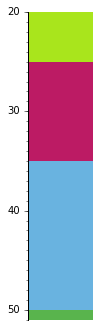

In [19]:
tops.plot(aspect=3)

Sometimes you want to plot 'tops'. 

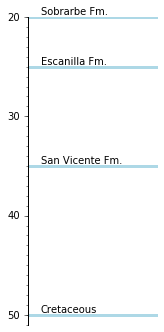

In [20]:
tops.plot(style='tops', field='formation', aspect=1.5)

<hr />
## Point data and a side-by-side plot

Some things really are point data. Sort of like a log, but irregular, more discrete. Here are some lab measurements... 

In [14]:
data_csv = """top, density, porosity, remarks, comp lithology, comp colour
30, 2300, 6.4,, sand,green
40, 2375, 7.3,, shale, grey
60, 2400, 8.2, broken sample,,
70, 2425, 9.2,, sand, 
80, 2575, 4.3,, shale,
90, 2600, 2.2,, sand, red
93, 2230, 2.1,, sand, 
"""

In [15]:
point_data = Striplog.from_csv(text=data_csv, points=True)

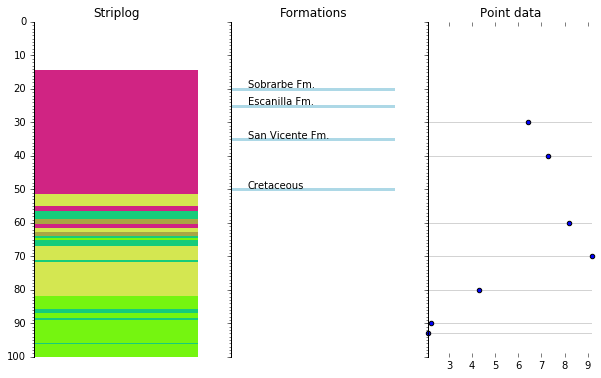

In [34]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, sharey=True, figsize=(10,6))
ax0 = strip.plot(ax=ax0, style='intervals')
ax1 = tops.plot(ax=ax1, style='tops', field='formation')
ax2 = point_data.plot(ax=ax2, style='points', field='porosity')

ax0.set_title('Striplog')
ax1.set_title('Formations')
ax2.set_title('Point data')

ax0.set_ylim(100, 0)
plt.show()